In [67]:
# IMPORTING NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.stats import chi2
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, precision_recall_curve, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier



ModuleNotFoundError: No module named 'lightgbm'

In [37]:
#IMPORTING DATABASE
df=pd.read_csv(r"C:\Users\bhawn\OneDrive\Desktop\hr analyastisc.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [39]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [40]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [41]:
df.columns.tolist()

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [42]:
# Checking types of columns
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [43]:
# Checking null values 
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [44]:
df.isnull().sum().sum()

0

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# DROPPING UNNECESSARY COLUMNS

In [46]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

In [47]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [48]:
# Print the shape of the DataFrame
print("The shape of data frame:", df.shape)
# Print the length (number of rows) of the DataFrame
print("Number of Rows in the dataframe:", len(df))
# Print the number of columns in the DataFrame
print("Number of Columns in the dataframe:", len(df.columns))

The shape of data frame: (1470, 31)
Number of Rows in the dataframe: 1470
Number of Columns in the dataframe: 31


In [49]:
#Checking unique values of each columns
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSinceLastPromotion       16
YearsWithC

In [50]:
#Checking description of dataset
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# PERFORM ANOVA TEST

In [52]:
num_cols = df.select_dtypes(np.number).columns

In [53]:
new_df = df.copy()

new_df["Attrition"] = new_df["Attrition"].replace({"No":0,"Yes":1})

In [54]:
f_scores = {}
p_values = {}

for column in num_cols:
    f_score, p_value = stats.f_oneway(new_df[column],new_df["Attrition"])
    
    f_scores[column] = f_score
    p_values[column] = p_value

# VISUALIZE THE F_SCORE OF ANOVA TEST

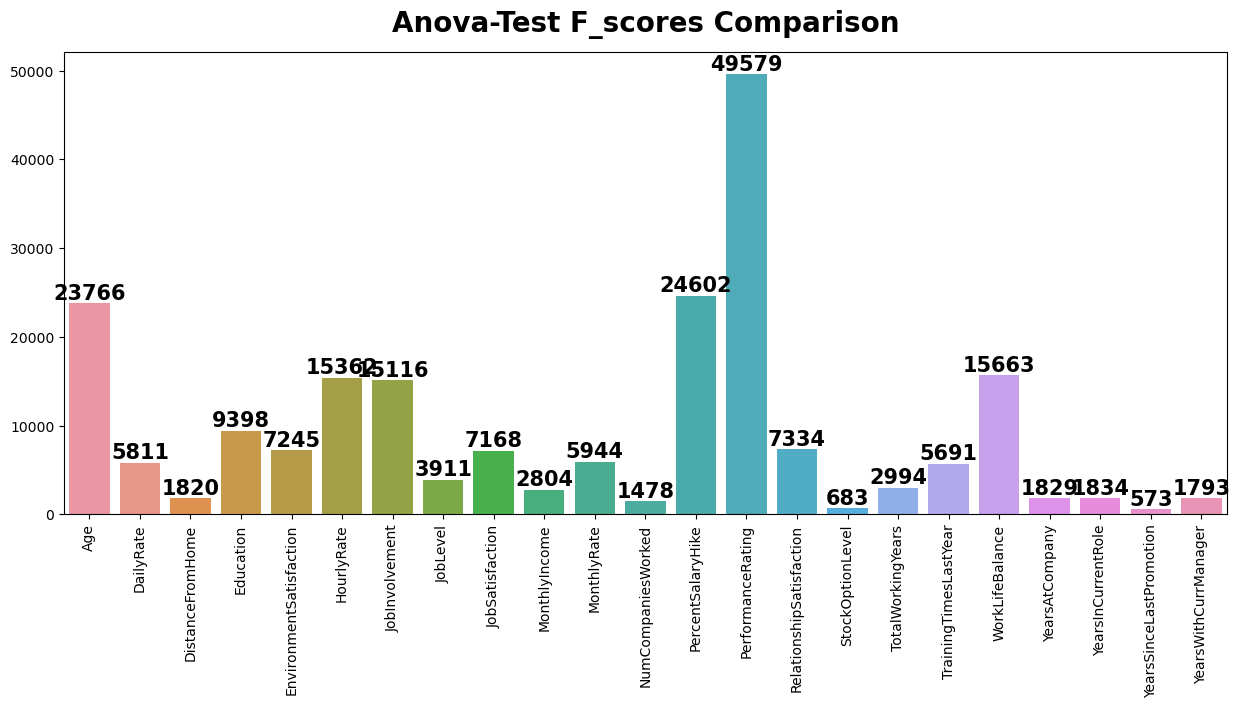

In [57]:
plt.figure(figsize=(15,6))
keys = list(f_scores.keys())
values = list(f_scores.values())

sns.barplot(x=keys, y=values)
plt.title("Anova-Test F_scores Comparison",fontweight="black",size=20,pad=15)
plt.xticks(rotation=90)

for index,value in enumerate(values):
    plt.text(index,value,int(value), ha="center", va="bottom",fontweight="black",size=15)
plt.show()

# COMPARING F_SCORE AND P_VALUE OF ANOVA TEST.

In [58]:
test_df = pd.DataFrame({"Features":keys,"F_Score":values})
test_df["P_value"] = [format(p, '.20f') for p in list(p_values.values())]

In [59]:
test_df

,Features,F_Score,P_value
0,Age,23766.934042,0.00000000000000000000
1,DailyRate,5811.796569,0.00000000000000000000
2,DistanceFromHome,1820.614585,0.00000000000000000000
3,Education,9398.987566,0.00000000000000000000
4,EnvironmentSatisfaction,7245.704914,0.00000000000000000000
5,HourlyRate,15362.122371,0.00000000000000000000
6,JobInvolvement,15116.579563,0.00000000000000000000
7,JobLevel,3911.331585,0.00000000000000000000
8,JobSatisfaction,7168.703089,0.00000000000000000000
9,MonthlyIncome,2804.459632,0.00000000000000000000


OBSERVATION:

The following features shows a strong association with attrition, as indicated by their high F-scores and very low p-values.

Age
DailyRate
HourlyRate
MonthlyIncome
MonthlyRate
NumCompaniesWorked
PercentSalaryHike
TotalWorkingYears
TrainingTimesLastYear
YearsAtCompany
YearsWithCurrManager
The following features doen't shows significant relationship with attrition because of their moderate F-scores and extremely high p-values.

DistanceFromHome
StockOptionLevel
YearsInCurrentRole
YearsSinceLastPromotion
It is important for the organization to pay attention to the identified significant features and consider them when implementing strategies to reduce attrition rates.

# PERFORM CHI-SQUARE TEST

In [61]:
cat_cols = df.select_dtypes(include="object").columns.tolist()
cat_cols.remove("Attrition")

In [63]:
chi2_statistic = {}
p_values = {}

# Perform chi-square test for each column
for col in cat_cols:
    contingency_table = pd.crosstab(df[col],df['Attrition'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    chi2_statistic[col] = chi2
    p_values[col] = p_value

# VISUALIZE THE CHI-SQUARE STATISTICS VALUES

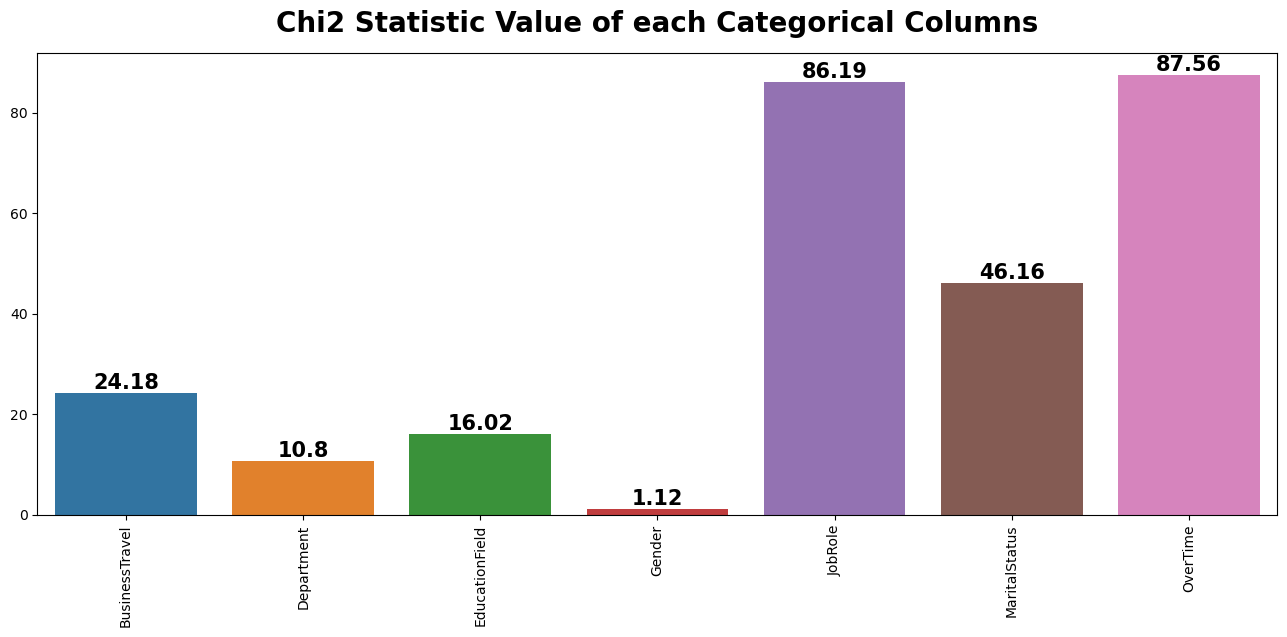

In [64]:
columns = list(chi2_statistic.keys())
values = list(chi2_statistic.values())

plt.figure(figsize=(16,6))
sns.barplot(x=columns, y=values)
plt.xticks(rotation=90)
plt.title("Chi2 Statistic Value of each Categorical Columns",fontweight="black",size=20,pad=15)
for index,value in enumerate(values):
    plt.text(index,value,round(value,2),ha="center",va="bottom",fontweight="black",size=15)

plt.show()

# COMPARING CHI^2_STATISTICS AND P_VALUE OF CHI^2 TEST.

In [65]:
test_df = pd.DataFrame({"Features":columns,"Chi_2 Statistic":values})
test_df["P_value"] =  [format(p, '.20f') for p in list(p_values.values())]

In [66]:
test_df

,Features,Chi_2 Statistic,P_value
0,BusinessTravel,24.182414,0.00000560861447644993
1,Department,10.796007,0.00452560657447963286
2,EducationField,16.024674,0.00677398013902521211
3,Gender,1.116967,0.29057244902890855265
4,JobRole,86.190254,0.00000000000000275248
5,MaritalStatus,46.163677,0.00000000009455511060
6,OverTime,87.564294,0.00000000000000000001


# CONVERTING CATEGORICAL COLUMNS

In [70]:
# Transform categorical data into dummies
dummy_col = [column for column in df.drop('Attrition', axis=1).columns if df[column].nunique() < 20]
data = pd.get_dummies(df, columns=dummy_col, drop_first=True, dtype='uint8')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Columns: 136 entries, Age to YearsWithCurrManager_17
dtypes: int64(8), object(1), uint8(127)
memory usage: 285.8+ KB


In [72]:
print(data.shape)

# Remove duplicate Features
data = data.T.drop_duplicates()
data = data.T

# Remove Duplicate Rows
data.drop_duplicates(inplace=True)

print(data.shape)

(1470, 136)
(1470, 136)


#TRAIN AND TEST DATASET


In [74]:
X = data.drop('Attrition', axis=1)
y = data.Attrition

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,
                                                    stratify=y)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
X_std = scaler.transform(X)

In [76]:
def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

In [77]:
y_test.value_counts()[0] / y_test.shape[0]

0.8390022675736961

In [78]:
stay = (y_train.value_counts()[0] / y_train.shape)[0]
leave = (y_train.value_counts()[1] / y_train.shape)[0]

print("===============TRAIN=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

stay = (y_test.value_counts()[0] / y_test.shape)[0]
leave = (y_test.value_counts()[1] / y_test.shape)[0]

print("===============TEST=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

===============TRAIN=================
Staying Rate: 83.87%
Leaving Rate: 16.13%
===============TEST=================
Staying Rate: 83.90%
Leaving Rate: 16.10%


In [79]:
def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

#LOGISTIC REGRESSION

In [80]:
lr_clf = LogisticRegression(solver='liblinear', penalty='l1')
lr_clf.fit(X_train_std, y_train)

evaluate(lr_clf, X_train_std, X_test_std, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[849  14]
 [ 59 107]]
ACCURACY SCORE:
0.9291
CLASSIFICATION REPORT:
                   No         Yes  accuracy    macro avg  weighted avg
precision    0.935022    0.884298  0.929057     0.909660      0.926839
recall       0.983778    0.644578  0.929057     0.814178      0.929057
f1-score     0.958780    0.745645  0.929057     0.852212      0.924397
support    863.000000  166.000000  0.929057  1029.000000   1029.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[348  22]
 [ 43  28]]
ACCURACY SCORE:
0.8526
CLASSIFICATION REPORT:
                   No        Yes  accuracy   macro avg  weighted avg
precision    0.890026   0.560000  0.852608    0.725013      0.836892
recall       0.940541   0.394366  0.852608    0.667453      0.852608
f1-score     0.914586   0.462810  0.852608    0.688698      0.841851
support    370.000000  71.000000  0.852608  441.000000    441.000000


#RANDOM FOREST CLASSIFIER

In [82]:
rf_clf = RandomForestClassifier(n_estimators=100, bootstrap=False,
#                                      class_weight={0:stay, 1:leave}
                                    )
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[863   0]
 [  0 166]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
              No    Yes  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    863.0  166.0       1.0     1029.0        1029.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[361   9]
 [ 63   8]]
ACCURACY SCORE:
0.8367
CLASSIFICATION REPORT:
                   No        Yes  accuracy   macro avg  weighted avg
precision    0.851415   0.470588  0.836735    0.661002      0.790103
recall       0.975676   0.112676  0.836735    0.544176      0.836735
f1-score     0.909320   0.181818  0.836735    0.545569      0.792194
support    370.000000  71.000000  0.836735  441.000000    441.000000


In [83]:
param_grid = dict(
    n_estimators= [100, 500, 900], 
    max_features= ['auto', 'sqrt'],
    max_depth= [2, 3, 5, 10, 15, None], 
    min_samples_split= [2, 5, 10],
    min_samples_leaf= [1, 2, 4], 
    bootstrap= [True, False]
)

rf_clf = RandomForestClassifier(random_state=42)
search = GridSearchCV(rf_clf, param_grid=param_grid, scoring='roc_auc', cv=5, verbose=1, n_jobs=-1)
search.fit(X_train, y_train)

rf_clf = RandomForestClassifier(**search.best_params_, random_state=42)
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[863   0]
 [ 15 151]]
ACCURACY SCORE:
0.9854
CLASSIFICATION REPORT:
                   No         Yes  accuracy    macro avg  weighted avg
precision    0.982916    1.000000  0.985423     0.991458      0.985672
recall       1.000000    0.909639  0.985423     0.954819      0.985423
f1-score     0.991384    0.952681  0.985423     0.972033      0.985141
support    863.000000  166.000000  0.985423  1029.000000   1029.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[360  10]
 [ 63   8]]
ACCURACY SCORE:
0.8345
CLASSIFICATION REPORT:
                   No        Yes  accuracy   macro avg  weighted avg
precision    0.851064   0.444444  0.834467    0.647754      0.785599
recall       0.972973   0.112676  0.834467    0.542825      0.834467
f1-score     0.907945   0.179775  0.834467    0.543860      0.790711
support    370.000000  71.000000  0.834467  441.000000    441.000000


#SUPPORT VECTOR MACHINE

In [84]:
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train_std, y_train)

evaluate(svm_clf, X_train_std, X_test_std, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[855   8]
 [ 47 119]]
ACCURACY SCORE:
0.9466
CLASSIFICATION REPORT:
                   No         Yes  accuracy    macro avg  weighted avg
precision    0.947894    0.937008   0.94655     0.942451      0.946137
recall       0.990730    0.716867   0.94655     0.853799      0.946550
f1-score     0.968839    0.812287   0.94655     0.890563      0.943583
support    863.000000  166.000000   0.94655  1029.000000   1029.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[345  25]
 [ 44  27]]
ACCURACY SCORE:
0.8435
CLASSIFICATION REPORT:
                   No        Yes  accuracy   macro avg  weighted avg
precision    0.886889   0.519231  0.843537    0.703060      0.827697
recall       0.932432   0.380282  0.843537    0.656357      0.843537
f1-score     0.909091   0.439024  0.843537    0.674058      0.833411
support    370.000000  71.000000  0.843537  441.000000    441.000000


In [85]:
svm_clf = SVC(random_state=42)

param_grid = [
    {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
    {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}
]

search = GridSearchCV(svm_clf, param_grid=param_grid, scoring='roc_auc', cv=3, refit=True, verbose=1)
search.fit(X_train_std, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=SVC(random_state=42),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             scoring='roc_auc', verbose=1)

In [86]:
svm_clf = SVC(**search.best_params_)
svm_clf.fit(X_train_std, y_train)

evaluate(svm_clf, X_train_std, X_test_std, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[862   1]
 [  6 160]]
ACCURACY SCORE:
0.9932
CLASSIFICATION REPORT:
                   No         Yes  accuracy    macro avg  weighted avg
precision    0.993088    0.993789  0.993197     0.993438      0.993201
recall       0.998841    0.963855  0.993197     0.981348      0.993197
f1-score     0.995956    0.978593  0.993197     0.987275      0.993155
support    863.000000  166.000000  0.993197  1029.000000   1029.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[346  24]
 [ 42  29]]
ACCURACY SCORE:
0.8503
CLASSIFICATION REPORT:
                   No        Yes  accuracy   macro avg  weighted avg
precision    0.891753   0.547170   0.85034    0.719461      0.836276
recall       0.935135   0.408451   0.85034    0.671793      0.850340
f1-score     0.912929   0.467742   0.85034    0.690335      0.841255
support    370.000000  71.000000   0.85034  441.000000    441.000000


#XGBOOST CLASSIFIER

In [87]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

evaluate(xgb_clf, X_train, X_test, y_train, y_test)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1], got ['No' 'Yes']

In [ ]:
#ADABOOST CLASSIFIER

In [ ]:
ab_clf = AdaBoostClassifier()
ab_clf.fit(X_train, y_train)

evaluate(ab_clf, X_train, X_test, y_train, y_test)

In [ ]:
#COMPARING MODEL PERFORMANCE

In [ ]:
ml_models = {
    'Random Forest': rf_clf, 
    'XGBoost': xgb_clf, 
    'Logistic Regression': lr_clf,
    'Support Vector Machine': svm_clf,
    'LightGBM': lgb_clf,
    'CatBoost': cb_clf,
    'AdaBoost': ab_clf
}

for model in ml_models:
    print(f"{model.upper():{30}} roc_auc_score: {roc_auc_score(y_test, ml_models[model].predict(X_test)):.3f}")